In [1]:
#Import modules
%matplotlib inline
#handling data
import sys
import json
import re
import numpy as np
import pandas as pd
from operator import itemgetter

#handling plots
import matplotlib.pyplot as plt
import seaborn as sns

#for network creation
import networkx as nx
import warnings

df = pd.read_csv("edges_replies_tweet3.csv")

In [2]:
plt.rcParams.update({
    'figure.figsize': (50, 50),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})

In [3]:
df.head(5)

Source          Target  weight
0     007Rousseau           POTUS       5
1        2Tbatteh   joelbnole4264       3
2       ActiveSGV       ActiveSGV       4
3  AlamoOnTheRise  AlamoOnTheRise      25
4       AlecTang_       AlecTang_       7

In [4]:
df.shape

(587, 3)

In [5]:
# Read Edgelist
graph = nx.from_pandas_edgelist(df, 'Source', 'Target', create_using=nx.DiGraph)

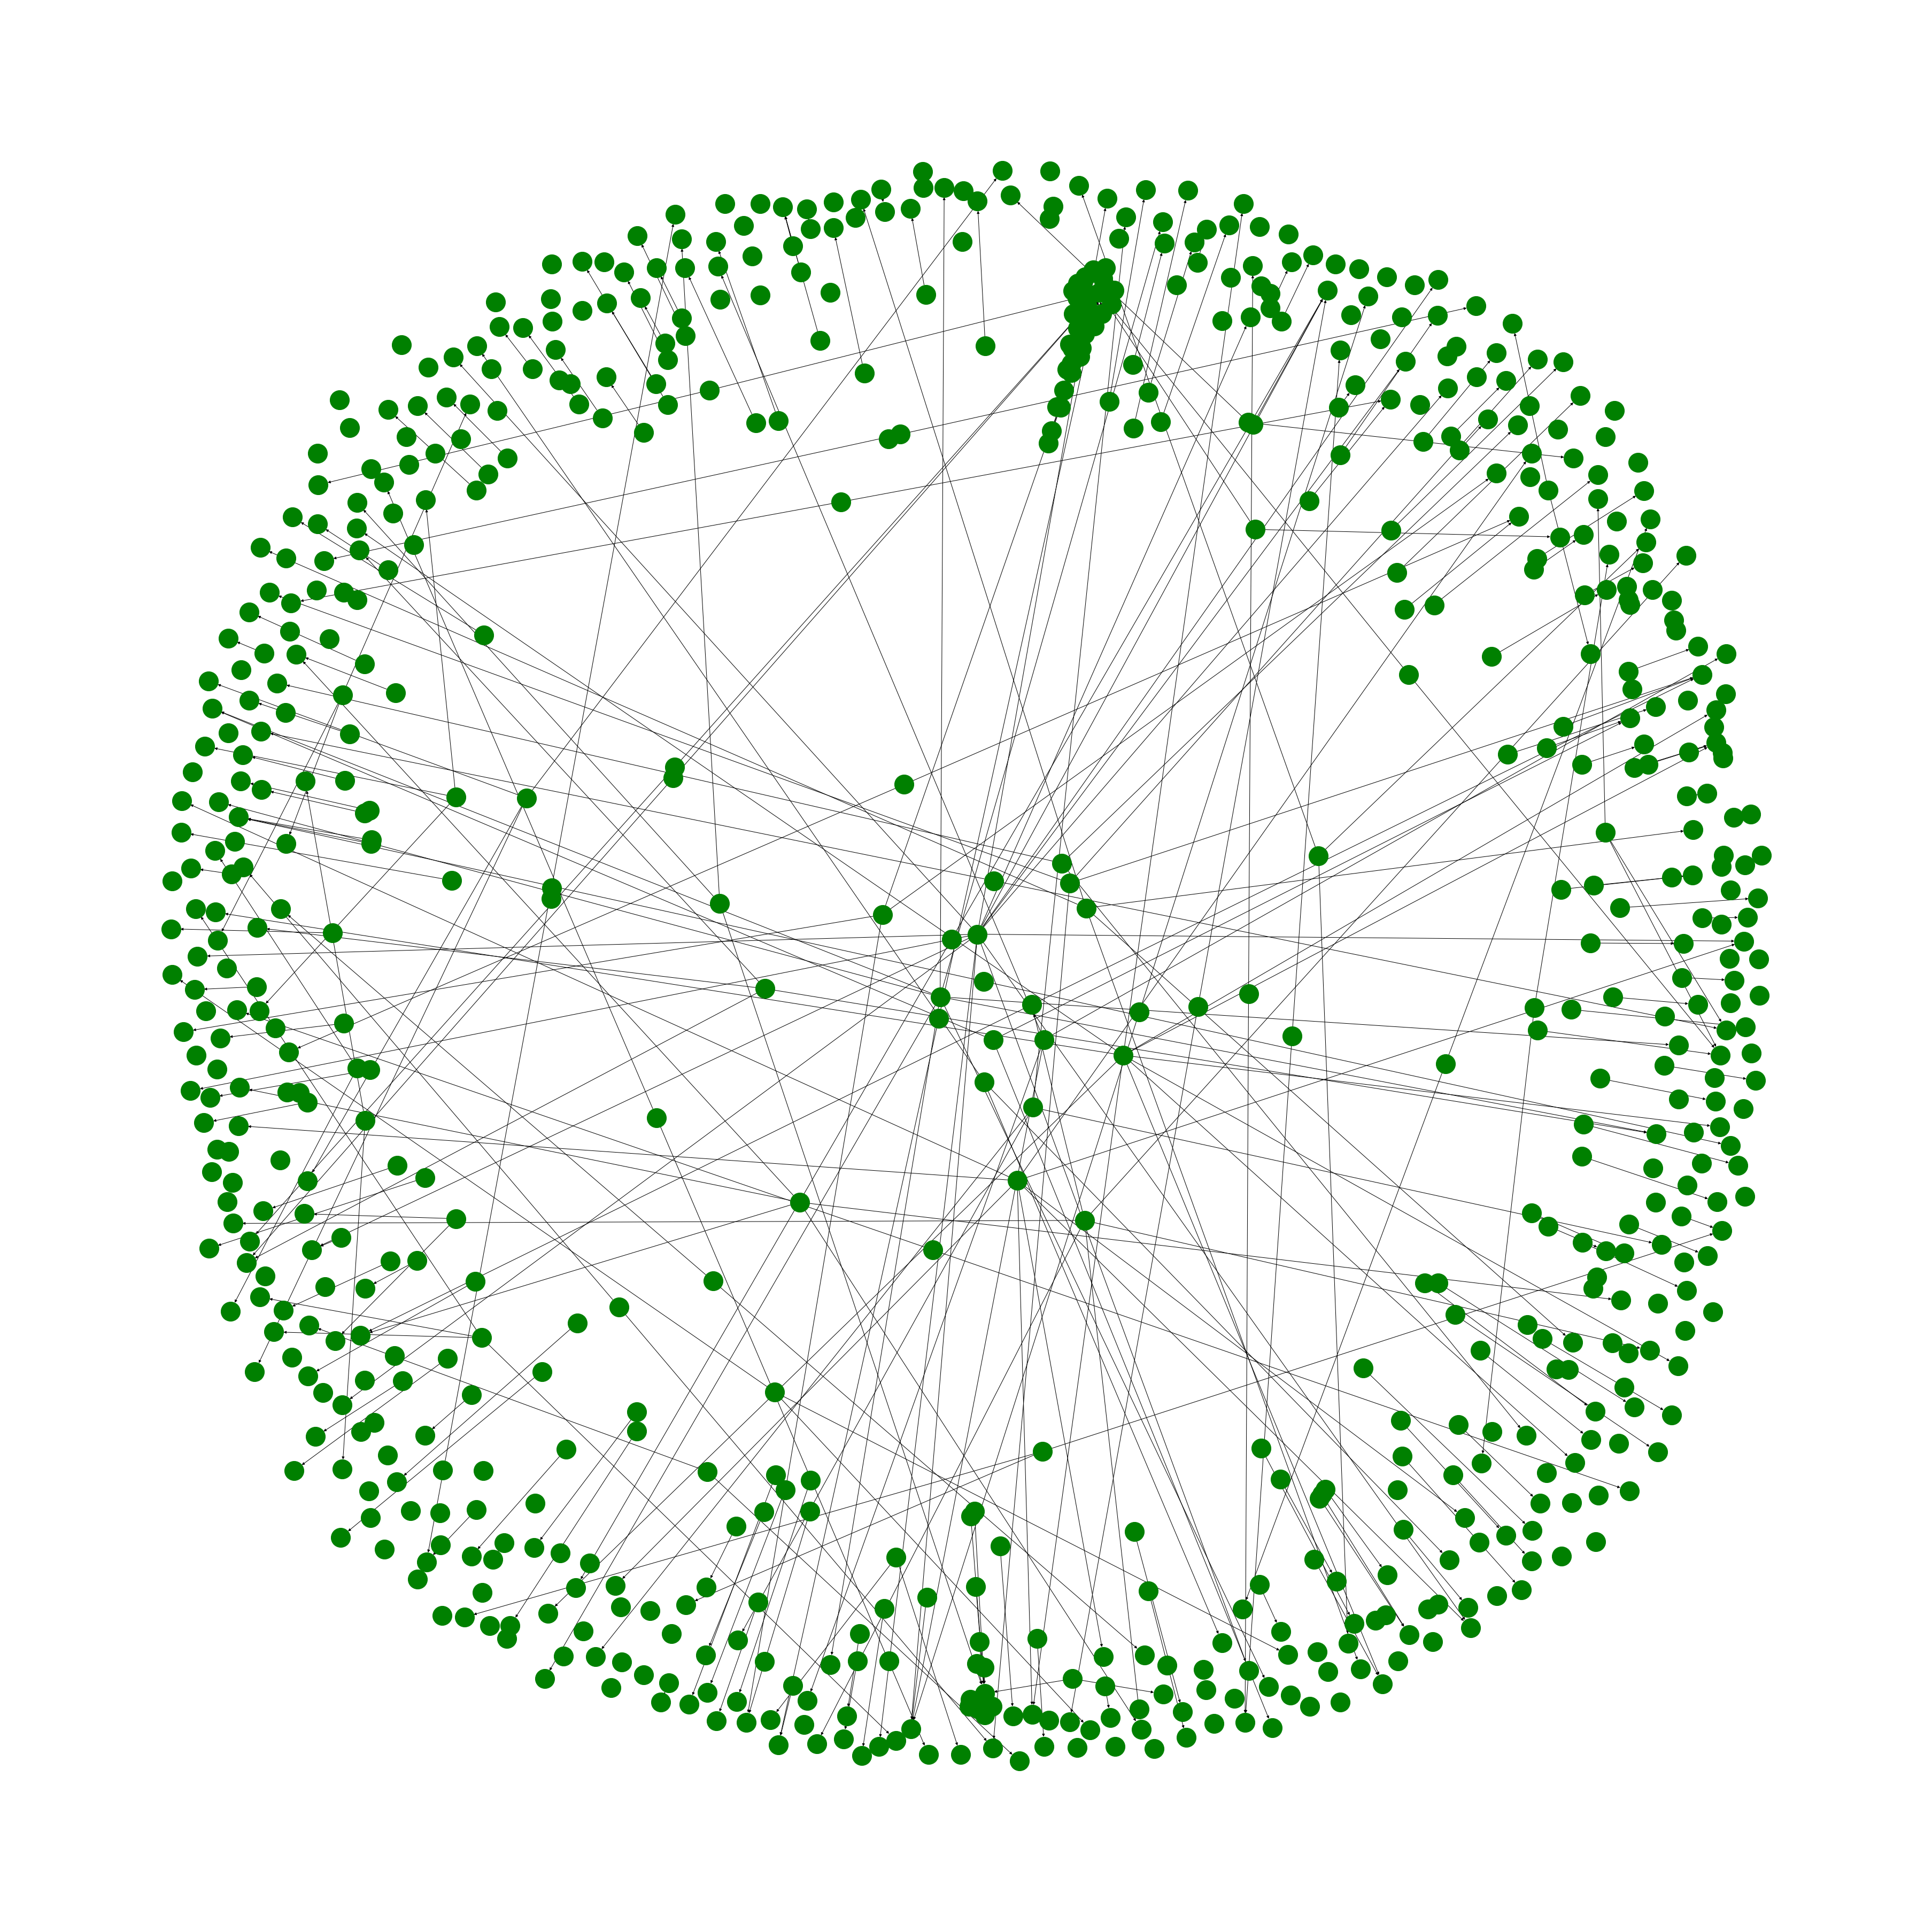

In [6]:
#draw a graph
nx.draw(graph,with_labels=False,font_color='maroon',font_size=30,node_size=1300,node_color='green')

#plot a graph
#plt.savefig('network(all-nodes).png')
plt.show()

In [7]:
if nx.is_weakly_connected(graph):
    print("The graph is connected")
else:
    print("The graph is not connected")
    
print(f"There are {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges present in the Graph")
print(f"There are {nx.number_weakly_connected_components(graph)} connected components in the Graph")

The graph is not connected
There are 726 nodes and 587 edges present in the Graph
There are 337 connected components in the Graph


In [8]:
def connected_component_subgraphs(graph):
    for c in nx.weakly_connected_components(graph):
        yield graph.subgraph(c)

In [9]:
largest_subgraph = max(connected_component_subgraphs(graph), key=len)

In [10]:
if nx.is_weakly_connected(largest_subgraph):
    print("The graph is connected")
else:
    print("The graph is not connected")
    
print(f"There are {largest_subgraph.number_of_nodes()} nodes and {largest_subgraph.number_of_edges()} \
edges present in the largest component of the Graph")

The graph is connected
There are 73 nodes and 77 edges present in the largest component of the Graph


In [11]:
# getting different graph attributes

print("Total number of nodes: ", int(largest_subgraph.number_of_nodes()))
print("Total number of edges: ", int(largest_subgraph.number_of_edges()))
print("List of all nodes: ", list(largest_subgraph.nodes()))
print("---------------------------------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------------------------------")
print("List of all edges: ", list(largest_subgraph.edges()))
print("---------------------------------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------------------------------")
print("In-degree for all nodes: ", dict(largest_subgraph.in_degree()))
print("---------------------------------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------------------------------")
print("Out degree for all nodes: ", dict(largest_subgraph.out_degree))

Total number of nodes:  73
Total number of edges:  77
List of all nodes:  ['Francisco_DA57', 'igneousidol', 'lisaemond1', 'eviefisher10', 'RevChuckCurrie', 'bobbievanderloo', 'mamadiana', 'mebeandreaaolco', 'GlobalGoalsUN', 'TajJacks', 'acoyne', 'WBG_Climate', 'Davisonjane', 'Yaniela', 'Brianrrs37', 'RodPhillips01', 'OptimisimLives', 'aschm32186', 'Jarnocan', 'realDonaldTrump', 'BrokenSpiritNMB', 'DonOfBankruptcy', 'jcam2344', 'seibertlinda44', 'fordnation', 'ClimateCentral', 'UNEP', 'TyDavies', 'SethP23', 'PaulEDawson', 'jerl_louk', 'DunnSusan', 'BBCWorld', 'HEINSLERJAN', 'DRRABI7', 'deebelle3', 'BillNye', 'jackhutton', 'UNFCCC', 'tveitdal', 'charlesadler', 'siliconglen', 'PercievedLogic', 'Graftacus', 'geoffreylaxton', 'robert_bergey', 'williamfreimuth', 'BestStephen', 'CivilRightsAd', 'Dipmishrad', 'MaggieEffinger', 'rescuethatfrog', 'DSHAPO', 'DHUNTtweets', 'TheEllenShow', 'HajjiADavis', 'NASAClimate', 'ClimatePower', 'MOregonRA', 'thehill', 'kevindunbar666', 'Randallsanimals', 'ca

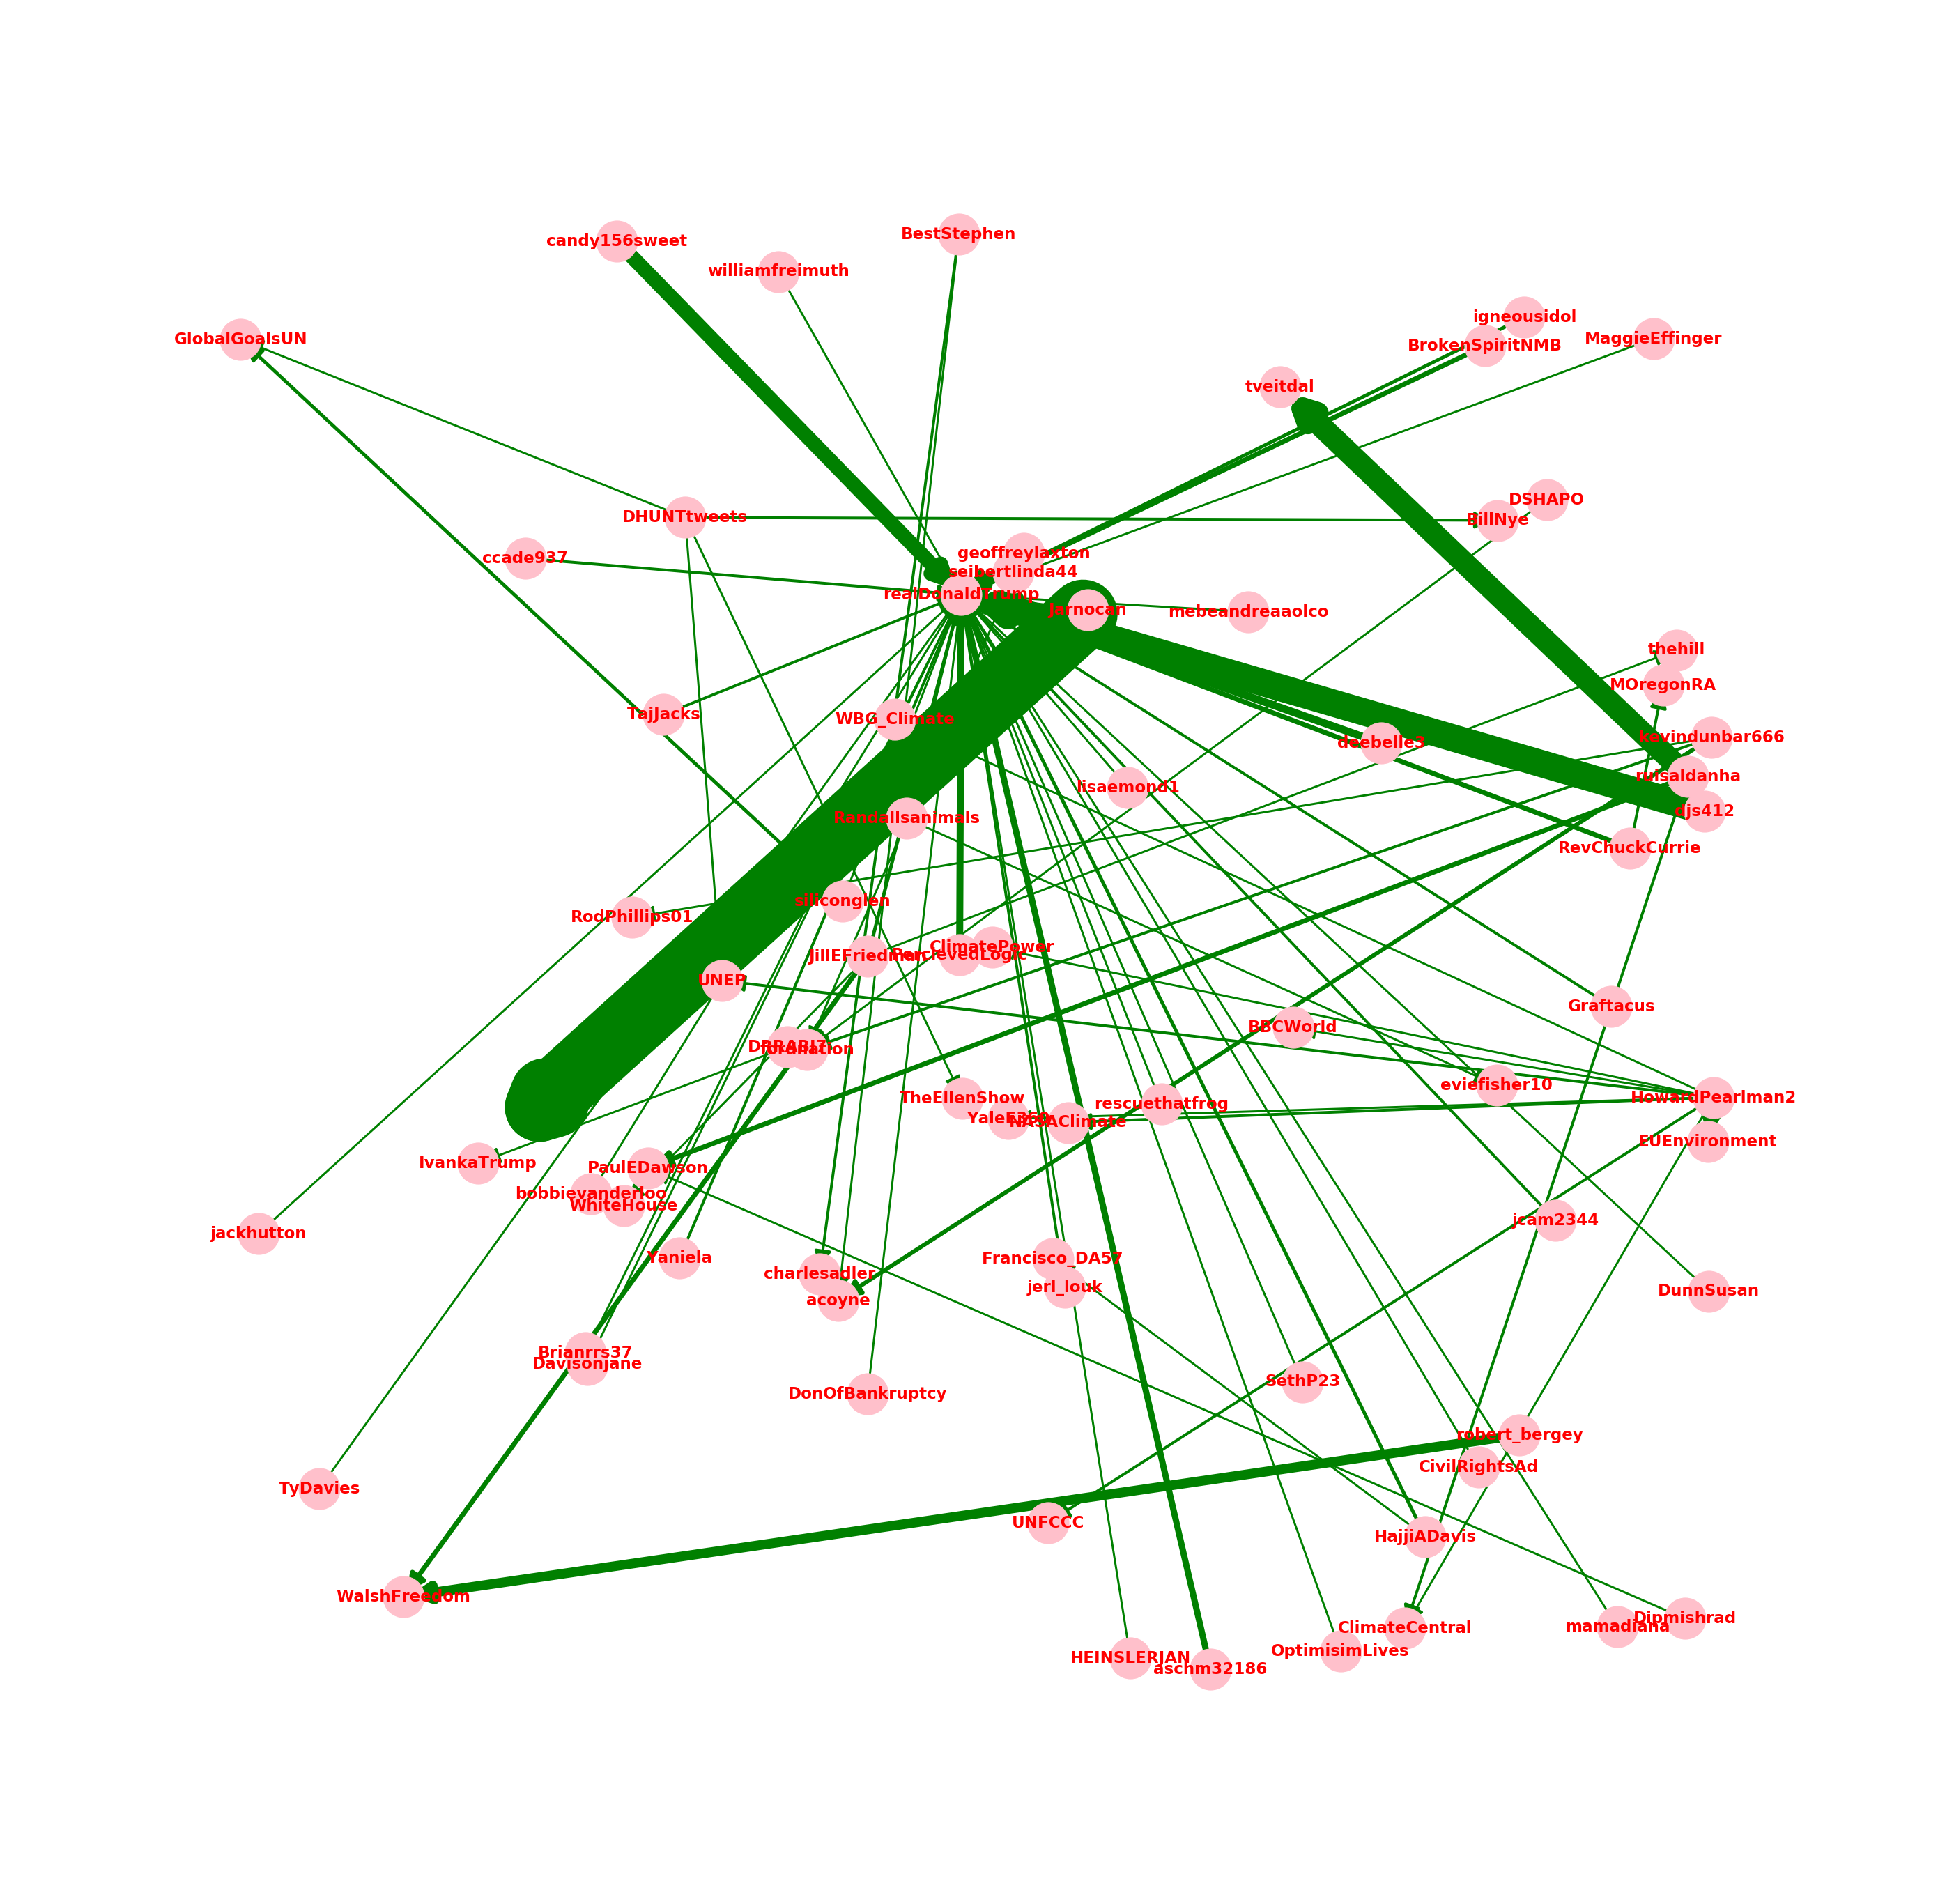

In [12]:
#Draw graph with edge's width = weight value
weights = [i * 1 for i in df['weight'].tolist()]

pos = nx.random_layout(largest_subgraph)
nx.draw_networkx_edges(largest_subgraph, pos, edge_color='green', arrowsize=50, width=weights)
nx.draw_networkx_nodes(largest_subgraph, pos,node_color='pink', node_size=3500)
nx.draw_networkx_labels(largest_subgraph, pos, font_size=23, font_weight='bold', font_color='red')
plt.gca().margins(0.1, 0.1)
plt.savefig('network(largest-subgraph4).png')
plt.show()

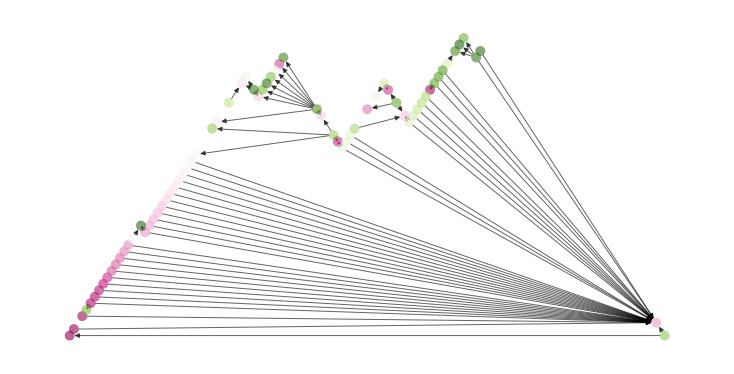

In [13]:
plt.figure(figsize = (10,5))
pos = nx.planar_layout(largest_subgraph)
nx.draw(largest_subgraph, pos=pos, node_color=range(73), cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=90, alpha=0.6, with_labels=False)
plt.savefig('network(largest-subgraph5).png')
plt.show()

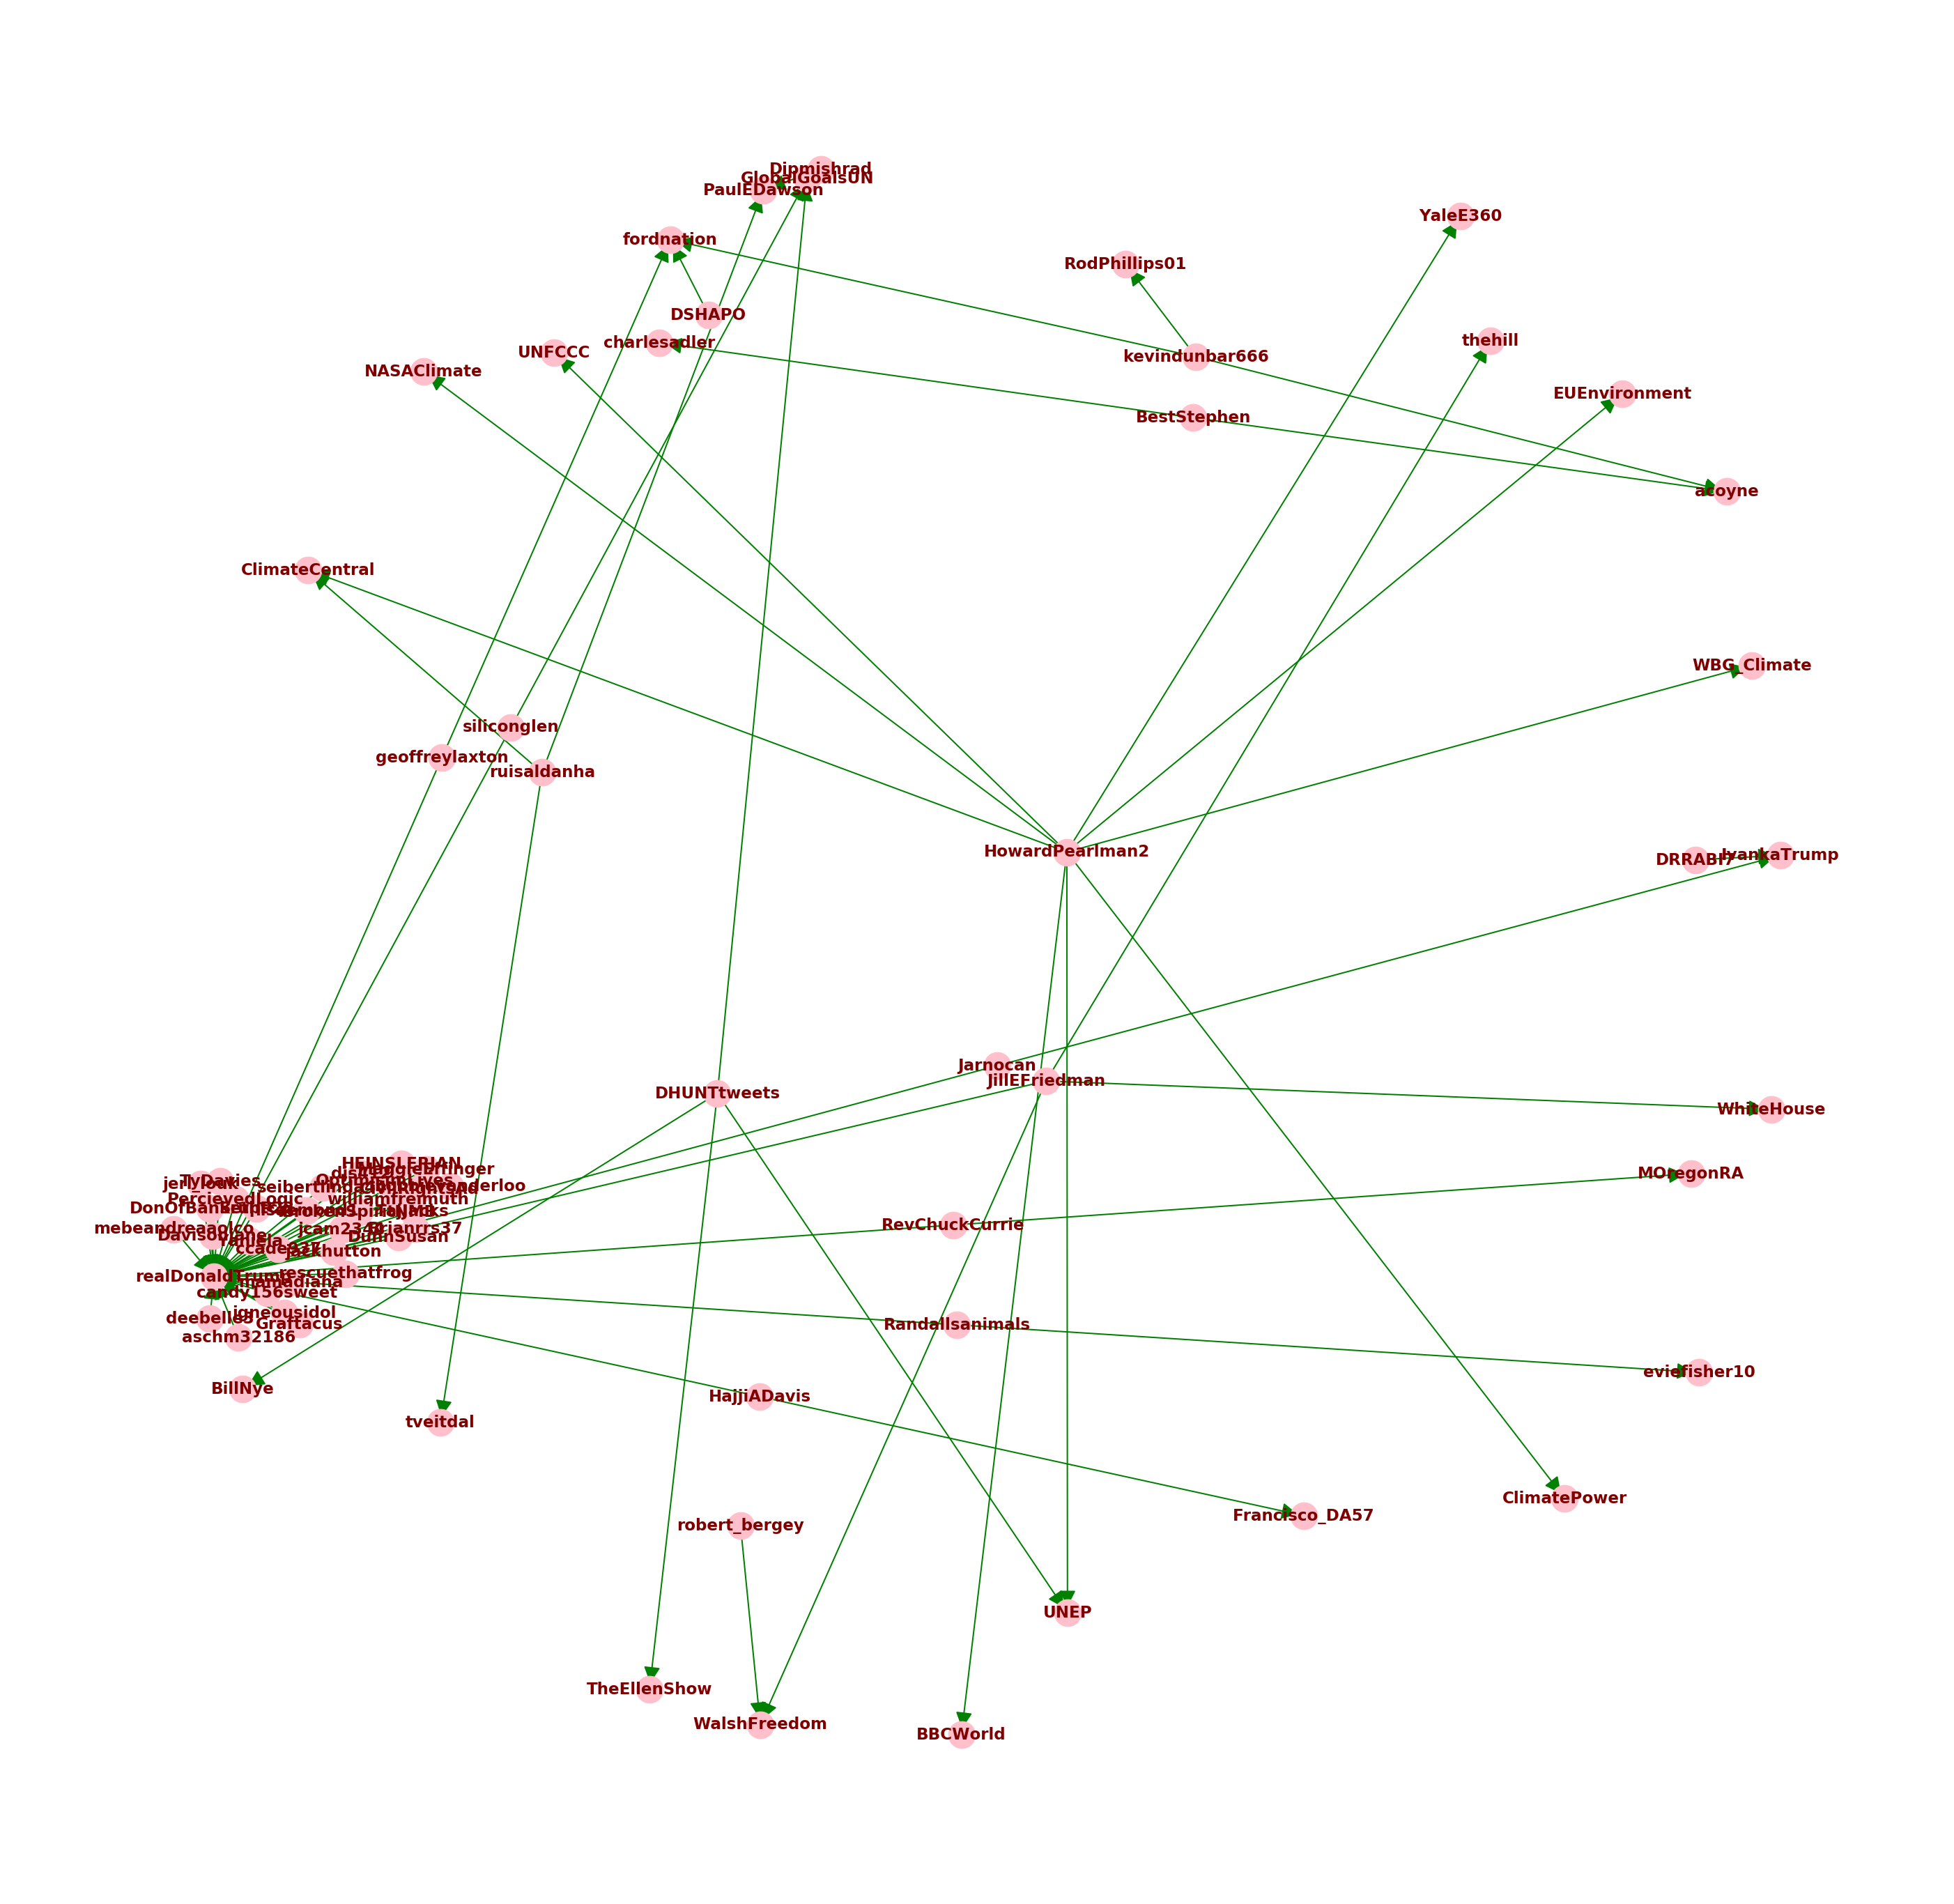

<Figure size 36000x28800 with 0 Axes>

In [14]:
pos = nx.spring_layout(largest_subgraph)
nx.draw_networkx_edges(largest_subgraph, pos, edge_color='green', arrowsize=50, width=2)
nx.draw_networkx_nodes(largest_subgraph, pos,node_color='pink', node_size=1500)
nx.draw_networkx_labels(largest_subgraph, pos, font_size=23, font_weight='bold', font_color='maroon')
plt.figure(figsize = (500,400))
plt.savefig('network(largest-subgraph7).png')
plt.show()

In [15]:
### Most Pagerank Connection
nx.pagerank(largest_subgraph, alpha=0.85)

pagerank_scores = nx.pagerank(largest_subgraph)
for w in sorted(pagerank_scores, key=pagerank_scores.get, reverse=True):
    print(w, pagerank_scores[w])

realDonaldTrump 0.2596502975905929
fordnation 0.022128519756945558
IvankaTrump 0.019782148312571413
PaulEDawson 0.018433043913628825
WalshFreedom 0.017934410390913046
PercievedLogic 0.015122791681133405
williamfreimuth 0.015122791681133405
acoyne 0.014737568070312089
GlobalGoalsUN 0.01423893454759631
Francisco_DA57 0.012391196625937944
eviefisher10 0.012391196625937944
charlesadler 0.012391196625937944
RevChuckCurrie 0.012133439742955839
MOregonRA 0.012133439742955839
ClimateCentral 0.011863309081065742
UNEP 0.011364675558349963
RodPhillips01 0.011042092226995356
tveitdal 0.011042092226995356
kevindunbar666 0.011042092226995356
ruisaldanha 0.011042092226995356
BillNye 0.010543458704279578
TheEllenShow 0.010543458704279578
thehill 0.010543458704279578
WhiteHouse 0.010543458704279578
WBG_Climate 0.009516937636691597
BBCWorld 0.009516937636691597
UNFCCC 0.009516937636691597
NASAClimate 0.009516937636691597
ClimatePower 0.009516937636691597
YaleE360 0.009516937636691597
EUEnvironment 0.009

In [16]:
node_and_degree = largest_subgraph.degree()
colors_central_nodes = ['maroon','red','orange','gold','yellow']
central_nodes = ['realDonaldTrump','fordnation','IvankaTrump','PaulEDawson','WalshFreedom'] #Based on three parameters scores

In [17]:
#pos = nx.spring_layout(largest_subgraph, k=1, iterations=35) #Graph visualization theme
pos = nx.kamada_kawai_layout(largest_subgraph)

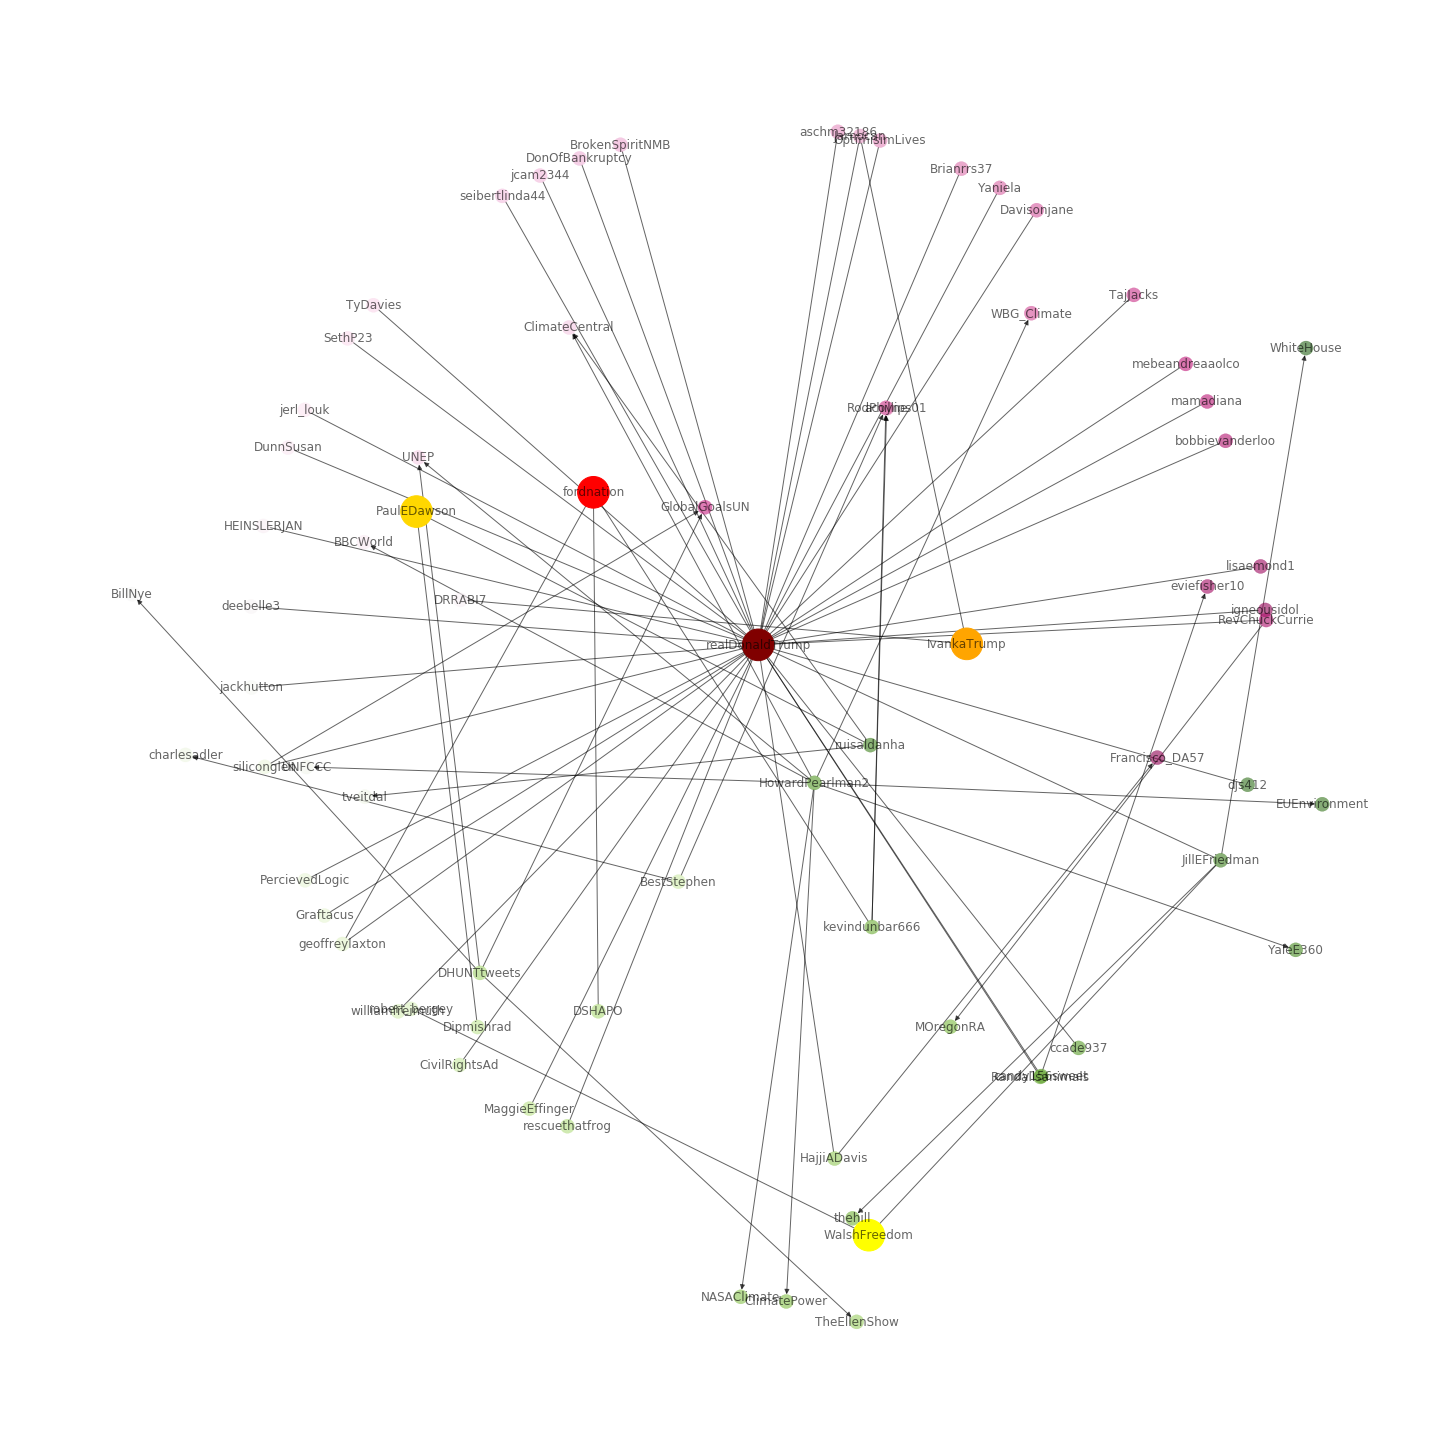

In [18]:
plt.figure(figsize = (20,20))
nx.draw(largest_subgraph, pos=pos, node_color=range(73), cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=200, alpha=0.6, with_labels=True)
nx.draw_networkx_nodes(largest_subgraph, pos=pos, nodelist=central_nodes, node_size=1000, node_color=colors_central_nodes)
#plt.savefig('pagerank.png')
plt.show()

In [19]:
pagerank_scores = nx.pagerank(largest_subgraph)
node_indegree = dict(largest_subgraph.in_degree())
node_outdegree = dict(largest_subgraph.out_degree())


In [20]:
#Pagerank
import pandas as pd
import numpy as np

user_score = pd.DataFrame(dict(
    pagerank_scores = pagerank_scores,
    node_indegree = node_indegree,
    node_outdegree = node_outdegree
))

user_score.index.name='Username'
user_score

pagerank_scores  node_indegree  node_outdegree
Username                                                      
Francisco_DA57         0.012391              1               0
igneousidol            0.008696              0               1
lisaemond1             0.008696              0               1
eviefisher10           0.012391              1               0
RevChuckCurrie         0.012133              1               3
...                         ...            ...             ...
JillEFriedman          0.008696              0               4
EUEnvironment          0.009517              1               0
djs412                 0.008696              0               1
IvankaTrump            0.019782              2               0
WhiteHouse             0.010543              1               0

[73 rows x 3 columns]

In [21]:
#user_score.to_json('user_scoree.json')

In [22]:
#Pagerank
import pandas as pd
import numpy as np

user_score = pd.DataFrame(dict(
    pagerank_scores = pagerank_scores,
))

user_score.index.name='Username'
user_score

pagerank_scores
Username                        
BBCWorld                0.009517
BestStephen             0.008696
BillNye                 0.010543
Brianrrs37              0.008696
BrokenSpiritNMB         0.008696
...                          ...
seibertlinda44          0.008696
siliconglen             0.008696
thehill                 0.010543
tveitdal                0.011042
williamfreimuth         0.015123

[73 rows x 1 columns]

In [23]:
user_score['pagerank_scores'].sum()

0.9999999999999999

In [24]:
# create excel writer object
writer = pd.ExcelWriter('output.xlsx')
# write dataframe to excel
#user_score.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.
